# Week 9: Day 2 – K-means Clustering
k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 
## K Means Clustering Algorithm

In [ ]:
import numpy as np
from PIL import Image
from IPython.display import display

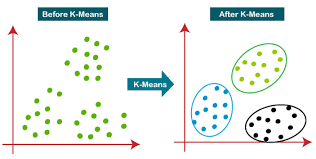

In [ ]:
im=Image.open('K Means.png')
display(im)
array=np.array

In [ ]:
# importing all the required packages
%matplotlib inline 
import matplotlib.pyplot as plt
# for ploting style
import seaborn as sns; sns.set() 
import numpy as np 
import numpy as np 

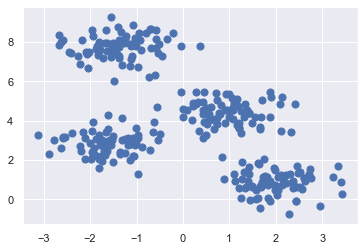

In [ ]:
# importing dummy data from the make_blobs and creating a scatter plot to see how they are related to each other
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
# to start the kmeans process we need to assign four clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
y_kmeans

array([2, 0, 1, 0, 2, 2, 3, 1, 0, 0, 3, 0, 1, 0, 2, 1, 1, 2, 3, 3, 2, 2,
       1, 3, 3, 1, 2, 1, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 1, 3, 1, 1,
       3, 3, 0, 3, 0, 2, 3, 2, 0, 2, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3,
       0, 2, 0, 3, 1, 3, 0, 3, 3, 0, 3, 1, 2, 0, 2, 1, 2, 2, 0, 1, 2, 1,
       0, 0, 1, 2, 0, 3, 3, 1, 2, 2, 1, 3, 0, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       3, 3, 2, 0, 2, 1, 0, 2, 2, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 0, 3,
       3, 2, 0, 3, 3, 0, 1, 0, 0, 3, 1, 3, 1, 3, 0, 1, 0, 0, 0, 1, 0, 1,
       2, 3, 0, 3, 2, 1, 0, 1, 1, 2, 1, 3, 3, 1, 2, 1, 1, 0, 2, 1, 3, 0,
       2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 3, 1, 1, 3, 3, 3, 1,
       3, 0, 1, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 1, 1, 0, 3, 3, 2, 2, 1,
       0, 2, 2, 3, 2, 3, 1, 0, 0, 1, 1, 0, 1, 2, 3, 1, 2, 3, 0, 3, 2, 1,
       2, 0, 0, 0, 0, 3, 3, 0, 1, 3, 2, 1, 3, 3, 3, 2, 2, 0, 1, 1, 3, 2,
       0, 3, 1, 0, 1, 2, 2, 3, 3, 1, 2, 2, 2, 1, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 3, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1, 0, 3])

In [ ]:
# importing pairwise_distances_argmin module
from sklearn.metrics import pairwise_distances_argmin 

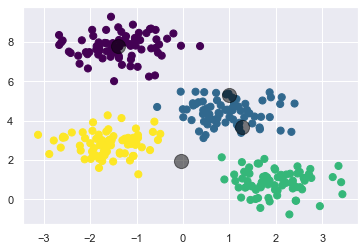

In [ ]:
# 1. randomly choosing cluster
# 2. assign labels base on closest center
# 3. find new centers from means of point
# 4. check for convergence 

def find_clusters(X,n_clusters,rseed =2):
    
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0]) [:n_clusters]
    centers =X[i]
    
    while True:
        labels = pairwise_distances_argmin(X, centers)
        
        new_centers = np.array([X[labels == i].mean(0)
                           for i in range (n_clusters)])
        
        if np.all(centers == new_centers):
            break
        centers = new_centers
        
        return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
        
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

## To perform color compression using K-Means algorithm
## Example 1

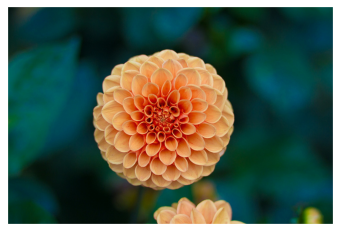

In [ ]:
# note; this requires the "pillow" parkage to be installed
# we import the library and also the image

from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
# returns the dimensions of the array
china.shape

(427, 640, 3)

In [ ]:
# reshape the data into n_samples x n-features, and rescale the colours so that they can lie between 0 1nd 1
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
data

array([[0.00784314, 0.0745098 , 0.05098039],
       [0.01176471, 0.07058824, 0.05098039],
       [0.02745098, 0.07843137, 0.05098039],
       ...,
       [0.02745098, 0.18039216, 0.10980392],
       [0.03137255, 0.17647059, 0.10980392],
       [0.03529412, 0.16862745, 0.10588235]])

In [ ]:
# visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency
# chose a random subset

def plot_pixels(data, title, color=None, N=10000):
    if color is None:
        colors = data
        
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T
        
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red',ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        
        ax[1].scatter(R, G, color=colors, marker='.')
        ax[1].set(xlabel='Red',ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        
        fig.suptitle(title, size=20);

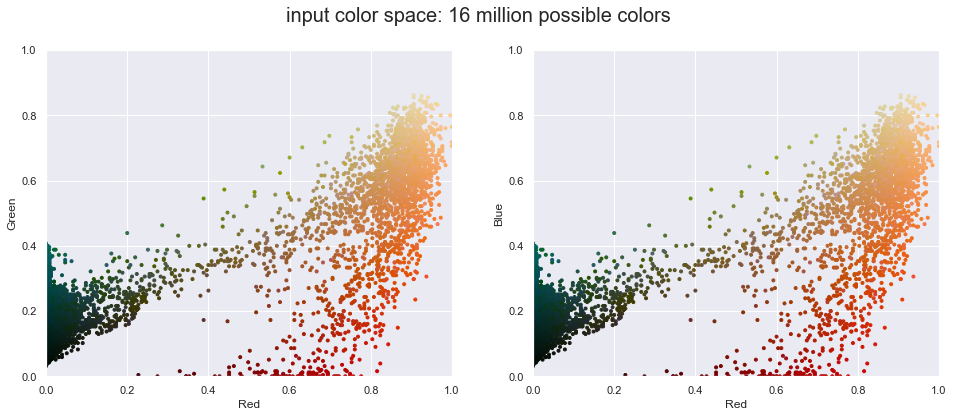

In [ ]:
plot_pixels(data, title='input color space: 16 million possible colors')

In [ ]:
# fix numpy.issues
import warnings; warnings.simplefilter('ignore')

In [ ]:
# reducing these 16 million colors to just 16 colours
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, color = new_colors,
            title="Reduce color space: 16 colors")


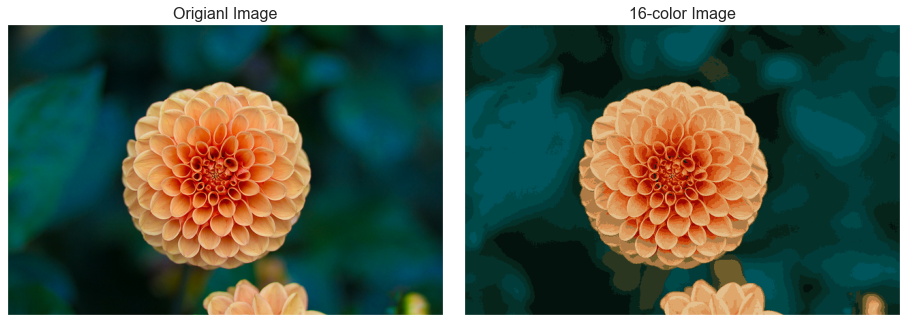

In [ ]:
# the result is re-coloring of the original pixels, where each is assigned the color of its closest cluster center 
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Origianl Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size = 16);

## Example 2

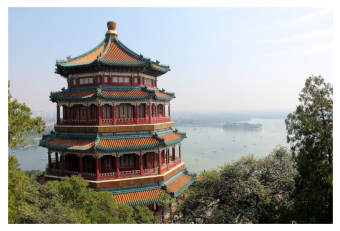

In [ ]:
# we import the library and also the image

from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

In [ ]:
# returns the dimensions of the array
china.shape

(427, 640, 3)

In [ ]:
# reshape the data into n_samples x n-features, and rescale the colours so that they can lie between 0 1nd 1
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape

(273280, 3)

In [ ]:
# visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency
# chose a random subset

def plot_pixels(data, title, color=None, N=10000):
    if color is None:
        colors = data
        
        rng = np.random.RandomState(0)
        i = rng.permutation(data.shape[0])[:N]
        colors = colors[i]
        R, G, B = data[i].T
        
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        ax[0].scatter(R, G, color=colors, marker='.')
        ax[0].set(xlabel='Red',ylabel='Green', xlim=(0, 1), ylim=(0, 1))
        
        ax[1].scatter(R, G, color=colors, marker='.')
        ax[1].set(xlabel='Red',ylabel='Blue', xlim=(0, 1), ylim=(0, 1))
        
        fig.suptitle(title, size=20);

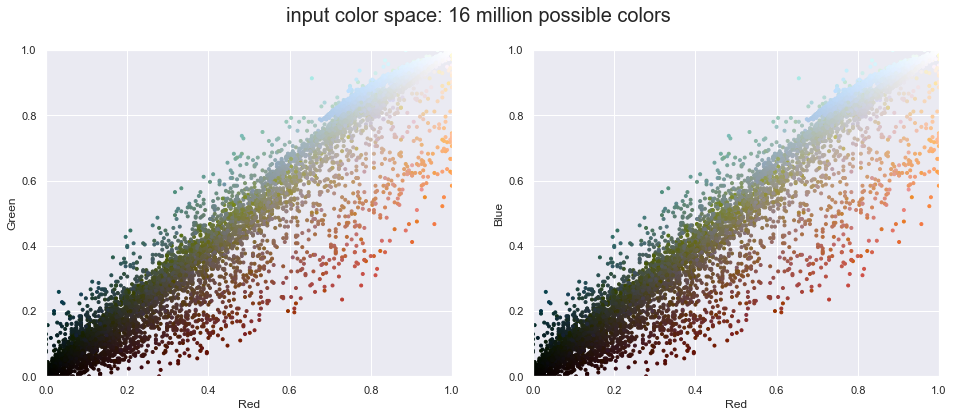

In [ ]:
plot_pixels(data, title='input color space: 16 million possible colors')

In [ ]:
# fix numpy.issues
import warnings; warnings.simplefilter('ignore')

In [ ]:
# reducing these 16 million colors to just 16 colours
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, color = new_colors,
            title="Reduce color space: 16 colors")


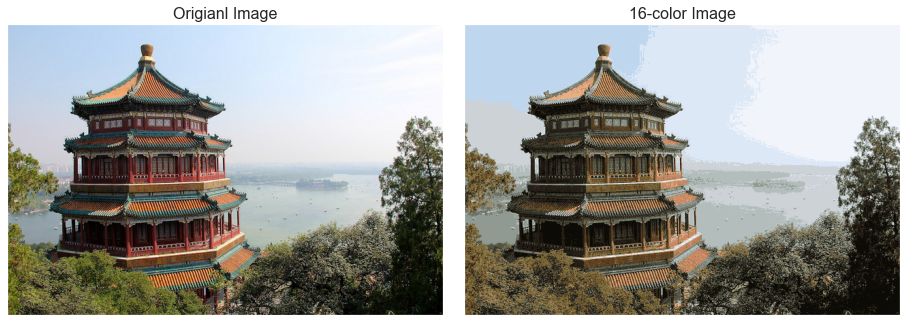

In [ ]:
# the result is re-coloring of the original pixels, where each is assigned the color of its closest cluster center 
china_recolored = new_colors.reshape(china.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace = 0.05)
ax[0].imshow(china)
ax[0].set_title('Origianl Image', size = 16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size = 16);

# Unsupervised learning KMeans clustering

In [ ]:
# lets import the required library and the data set
import pandas as pd

data = pd.read_csv('C:\\Users\\Zachary_B\\Desktop\\dataset\\zoo.csv')

In [ ]:
# check for missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


[1 2 3 4 5 6 7]


<AxesSubplot:>

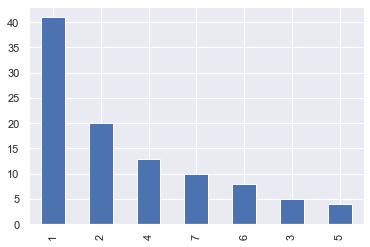

In [ ]:
# identifying the unique labels and plot them
import numpy as np
labels = data['class_type']
print(np.unique(labels.values))

from matplotlib import pyplot as plt
%matplotlib inline
fig,ax = plt.subplots()
(labels.value_counts()).plot(ax=ax, kind='bar')

In [ ]:
data.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
# lets extract the feautures neccesary for clustering within a single variable 
features = data.values[:,1:-1]
features.shape

(101, 16)

In [ ]:
# importing the necessary models for performing clustering
# sepcifing the total number of clustering as 7

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

model = AgglomerativeClustering(n_clusters=7,linkage='average',affinity='cosine')

In [ ]:
# fit the agglomerative clustering model on the feature data

model.fit(features)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=7)

In [ ]:
# predict labels for each animals
model.labels_

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 6, 0, 0, 0, 0, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 4, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 5, 0, 0, 4, 3, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0], dtype=int64)

In [ ]:
# returns the unique values
print(np.unique(model.labels_))

[0 1 2 3 4 5 6]


In [ ]:
 labels = labels-1

In [ ]:
#  now lets go ahead to predict the accuracy of our model
from sklearn.metrics import mean_squared_error

In [ ]:
# using the mean squared error as the prsdicting parameter
score = mean_squared_error(labels,model.labels_)

In [ ]:
# # evaluating the absolute error by applying square root opperation on the mean square error
abs_error=np.sqrt(score)
print(abs_error)

2.4373333911071624


### 2nd Senario

In [ ]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(12,6)

In [ ]:
# loading and reading the data set
df = pd.read_csv('C:\\Users\\Zachary_B\\Desktop\\dataset\\driver-data.csv')
df.head()

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
# checking for the info of the data set
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [ ]:
# this function check the count mean and median of the data set
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041523,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [ ]:
# importing k means from sklearn
from sklearn.cluster import KMeans

In [ ]:
# lets create an instance of the k means cluster
kmeans = KMeans(n_clusters=2)
df_analyze = df.drop('id', axis = 1)

In [ ]:
# lets fit the model to the data
kmeans.fit(df_analyze)

KMeans(n_clusters=2)

In [ ]:
#let use the cluster center comands to determine the cluster center vector
kmeans.cluster_centers_

array([[ 50.04763438,   8.82875   ],
       [180.017075  ,  18.29      ]])

In [ ]:
#lets print and get the len of the labels
print(kmeans.labels_)
print(len(kmeans.labels_))

[0 0 0 ... 1 1 1]
4000


In [ ]:
# checking for unique drivers in the first and second cluster
print(type(kmeans.labels_))
unique,counts = np.unique(kmeans.labels_,return_counts=True)
print(dict(zip(unique,counts)))

<class 'numpy.ndarray'>
{0: 3200, 1: 800}


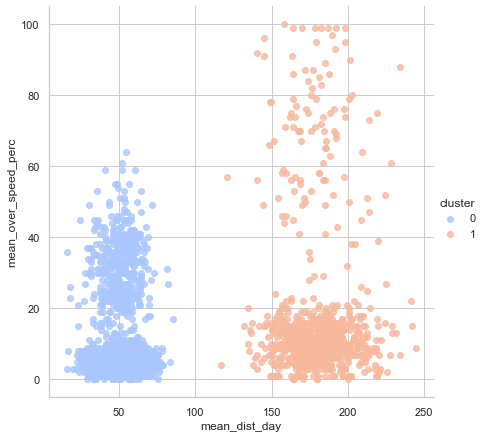

In [ ]:
# plotting the cluster
df_analyze['cluster'] = kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,
          hue='cluster',palette='coolwarm', size=6,aspect=1,fit_reg=False)

In [ ]:
# lets increase the number of clister to 4
kmeans_4 =KMeans(n_clusters=4)
kmeans_4.fit(df.drop('id',axis=1))
kmeans_4.fit(df.drop('id',axis=1))
print(kmeans_4.cluster_centers_)
unique,counts = np.unique(kmeans_4.labels_,return_counts=True)

kmeans_4.cluster_centers_
print(dict(zip(unique,counts)))

[[ 49.99263253   5.20447169]
 [180.34311782  10.52011494]
 [ 50.40482436  32.36533958]
 [177.83509615  70.28846154]]
{0: 2773, 1: 696, 2: 427, 3: 104}


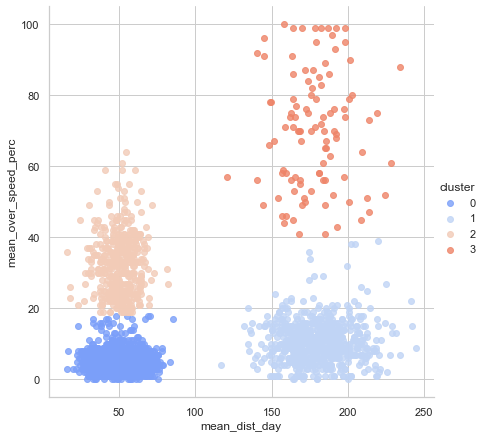

In [ ]:
df_analyze['cluster'] = kmeans_4.labels_
sns.set_style('whitegrid')
sns.lmplot('mean_dist_day','mean_over_speed_perc',data=df_analyze,
          hue='cluster',palette='coolwarm', size=6,aspect=1,fit_reg=False)